# Pipelines

![pipeline](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/pipeline.png)

Dive into the world of **Pipelines**, your new best friend for model inference. They function as an expressway, simplifying convoluted code and turning complex features into user-friendly tools. Each pipeline is designed to offer a streamlined API that caters to an array of tasks.

They are versatile and cater to a variety of data types, including:

- **Text**: Tackle Natural Language Processing tasks such as translation, summarization, and more with ease. Text-based tasks have never been smoother!
- **Audio**: Delve into the realm of sound with pipelines designed for audio data. Perfect for tasks such as speech recognition or music classification.
- **Visual**: Unleash the power of computer vision models. Ideal for tasks like image classification or object detection.
- **Multimodal Inference**: Why limit to one when you can handle multiple data types? With multimodal inference, you can combine text, audio, and visual inputs for enriched insights.

Harness the power of pipelines and elevate your AI projects with their effortless handling and efficiency.

## Advantages

Pipelines are your secret weapon for efficient AI development. Here's why:

- **Simplified Usage**: No more headaches over complex code. Pipelines make application a breeze.
- **Abstraction of Low-Level Details**: Keep your focus on the big picture. Pipelines handle the gritty details.
- **Unified API Across Different Tasks**: Enjoy consistency across tasks. One API, multiple applications.
- **Adaptable to Custom Models**: Flexibility at its best! Pipelines can easily adapt to your unique models.

Are there any veterans in the house who've experienced the power of pipelines in language processing libraries? We'd love to hear your tales from the trenches!

## Getting Started

To use the [Hugging Face pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines), import the `pipeline` class and specify the task you want to perform

### Harnessing pipeline() for Text Inference

Embark on a text analysis voyage with the `pipeline()` function. It's geared to cater to a variety of text-related tasks:

- **Text Classification**: Analyze and categorize your text data effortlessly.
- **Zero-Shot Classification**: Classify content into classes it's never seen during training. It's learning, elevated.
- **Text Generation**: Create new, meaningful text in a snap.
- **Text Completion (Mask Filling)**: Let the pipeline fill in the gaps for you in your masked text.
- **Token Classification**: Classify individual tokens in a sentence for tasks such as named entity recognition.
- **Question Answering**: Extract exact answers to specific questions from your text data.
- **Summarization**: Convert lengthy text into compact, meaningful summaries.
- **Translation**: Melt away language barriers – translate text into different languages.

Ready to explore? Let's dive in!

In [ ]:
!pip install -q transformers dataset evaluate
!pip install -q torch torchvision torchaudio

Make sure you initialize your notebook with GPU

In [ ]:
import torch

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"Found {device_count} CUDA device(s) available.")
    for i in range(device_count):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No CUDA devices available.")

No CUDA devices available.


Later, you'll see that we use pipeline like this:

```
pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0
```

`device=0` refer to the key number of the GPU that we want to use if we have multiple GPU available. You can check your available GPU(s) by running `nvidia-smi` command.

![link img](https://www.servethehome.com/wp-content/uploads/2021/07/8x-NVIDIA-A100-500W-nvidia-smi-output.jpg)

Run this function:

In [ ]:
from transformers import pipeline

def sentiment_analysis(text, device):
    device = 0 if device else "cpu"
    run = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)
    result = run(text)
    return result

def zero_shot_classification(text, kelas_zero_shot, device):
    device = 0 if device else "cpu"
    run = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)
    result = run(text, candidate_labels=kelas_zero_shot.split(","))
    return result

def text_generation(text, device):
    device = 0 if device else "cpu"
    run = pipeline("text-generation", model="gpt2", max_new_tokens=100, device=0)
    result = run(text)
    return result

def fill_mask(text, device):
    device = 0 if device else "cpu"
    run = pipeline("fill-mask", model="distilroberta-base", device=0)
    result = run(text)
    return result

def ner(text, device):
    device = 0 if device else "cpu"
    run = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", device=0)
    result = run(text)
    return result

def translation_en_to_fr(text, device):
    device = 0 if device else "cpu"
    run = pipeline("translation_en_to_fr", model="t5-base", device=0)
    result = run(text)
    return result


def func_pipeline(numb_task: int):
    if numb_task == "1":
        print("Example input: I've been waiting for a HuggingFace course my whole life.")
        input_text = input("Input: ")
        device = input("Use GPU? (True or False)")
        return sentiment_analysis(input_text, device)
    elif numb_task == "2":
        print("Example input: This is a course about the Transformers library")
        input_text = input("Input: ")
        kelas_zero_shot = input("Input Zero Shot Class: ")
        device = input("Use GPU? (True or False)")
        return zero_shot_classification(input_text, kelas_zero_shot, device)
    elif numb_task == "3":
        print("Example input: In this course, we will teach you how to")
        input_text = input("Input: ")
        device = input("Use GPU? (True or False)")
        return text_generation(input_text, device)
    elif numb_task == "4":
        print("Example input: This course will teach you all about <mask> models")
        input_text = input("Input: ")
        device = input("Use GPU? (True or False)")
        return fill_mask(input_text, device)
    elif numb_task == "5":
        print("Example input: My name is Sylvain and I work at Hugging Face in Brooklyn")
        input_text = input("Input: ")
        device = input("Use GPU? (True or False)")
        return ner(input_text, device)
    elif numb_task == "6":
        print("Example input: How are you?")
        input_text = input("Input: ")
        device = input("Use GPU? (True or False)")
        return translation_en_to_fr(input_text, device)
    else:
        return "Task not found!"

And try this function:

In [ ]:
input_task = input("Select number task: ")
# Task list:
# - 1. sentiment-analysis
# - 2. zero-shot-classification
# - 3. text-generation
# - 4. fill-mask
# - 5. ner
# - 6. translation_en_to_fr
print(func_pipeline(input_task))

#### Text classification

You're trying to understand if a sentence carries a **positive** or **negative** sentiment, but the coding process seems daunting? 🤔 Fear not! By utilizing Hugging Face's `pipeline()` function, you can easily tackle this. The following code simplifies the process:

This piece of code creates a tool that can determine the sentiment of text:

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

Now, let's use this tool to analyze a sentence:

In [ ]:
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

What about multiple sentences? No problem:
But this time, lets count the time which model took to do inference

In [ ]:
sentences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!"
]

In [ ]:
%%time
classifier(sentences)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

All the complex computations happen behind the scenes. The pipeline function and the pre-trained model give you a sentiment label (positive/negative), and a confidence score for each text. Simple, isn't it? 😎

Okay we got the result and also the time taken by model to do inference

Can we improve the inference time?

In [ ]:
## Yes we can, if you have GPU, the easiest one will be utilize the GPU to improve the performance
## Now lets add GPU to our pipeline
classifier_gpu = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

In [ ]:
%%time
classifier_gpu(sentences)

Wait !!!

How about its performance in language which not in the model's pretraining data

(BERT/distill-BERT pretraining data only consists of English Language)

In [ ]:
#  Example dataset from indonlp/indonlu - smsa
sentence_id = [
"menu warkop , tempat gaul . paling enak ke sini pagi hari masih sepi . kalau siang - malam ramai bingitzzxz . cocok untuk anak baru besar atau remaja . buat bincang bisnis tidak cocok tetlalu ramai . kopi nya gayo arabica mantap , sayang tidak ada manual brew . semuanya pakai expresso mesin . buat kawula muda cocoklah"
 ]

classifier_gpu(sentence_id)

What do you think 🤔
It sure the label should be positive right?
Lets try with finetuned model which used bahasa indonesia dataset as the pretraining data

In [ ]:
from transformers import pipeline
classifier_id = pipeline("sentiment-analysis", model="ayameRushia/roberta-base-indonesian-1.5G-sentiment-analysis-smsa")

In [ ]:
classifier_id(sentence_id)

#### Zero-shot classification

You have a statement and you're curious about which category it belongs to: education, politics, or business. However, you find the coding part a little tricky, right? 🤔 No worries! Using Hugging Face's `pipeline()` function, you can easily classify your statement.

Let's break it down with the following code, We start by creating a tool for classification:

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

Next, let's classify a sentence into one of the three categories:

In [ ]:
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"]
)

What's happening behind the scenes? The pipeline function and the specified model combine their powers to classify the provided statement into either "education", "politics", or "business", even though it hasn't seen these labels before during its training.

This process is called 'zero-shot classification', and it's cool because the model is making an educated guess based on its understanding of language and the relationships between words. Isn't that amazing? 😎

In [ ]:
##  Alternative, you can use model which used Bahasa Indonesia as pretraining dataset, here we have "ilos-vigil/bigbird-small-indonesian-nli"
classifier_zero_id = pipeline("zero-shot-classification", model="ilos-vigil/bigbird-small-indonesian-nli", device=0)

classifier_zero_id(
    "Saya sangat setuju dengan pembangunan gedung perkantoran",
    candidate_labels=["office space", "housing", "mall"]
)

#### Text Generation

You're interested in generating new text based on a given input, but the coding details seem overwhelming, right? 🤔 Don't fret! With Hugging Face's `pipeline()` function, you can generate text with ease. Check out how we simplify it below:

First, we create a tool that can generate text:

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")

Next, let's use this tool to generate some text:

In [ ]:
generator("In this course, we will teach you how to")

Here's what happens: the generator, built with a pre-trained model, uses the string "In this course, we will teach you how to" as a starting point and generates new text from it.

Now, let's add a few more features to our text generation:

In [ ]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

In this case, the `max_length=30` tells the generator that the text should not exceed 30 tokens. `num_return_sequences=2` asks the generator to provide two possible continuations of the input text.

So with the help of these lines of code, you get to generate one or more possible continuations of the given string. Isn't that neat? 😎

For each task, you can search the [**model hub**](https://huggingface.co/models) for various models you can use in the pipeline.

![huggingface-models](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/huggingface-models.png)

#### Text completion (mask filling)

You're trying to complete a sentence that has a missing word but the coding part seems a bit difficult, doesn't it? 🤔 No stress! With `pipeline()` function from Hugging Face, you can fill in the blanks easily. Here's the simplified version with the code:

Let's start by creating a tool that will fill in the masked word(s) in a sentence:

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")

Next, we use this tool to find the missing word in a sentence:

In [ ]:
unmasker("This course will teach you all about <mask> models", top_k=2)

Here's the magic behind it: The `unmasker`, equipped with a pre-trained model, looks at the sentence "This course will teach you all about `<mask>` models". It understands the `<mask>` as a placeholder for a word that it needs to predict based on the rest of the sentence. The `top_k=2` parameter tells it to come up with the top two most likely words that could fill the blank. Cool, isn't it? 😎

#### Token classification

![NER](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/ner.png)

You have a sentence with names, locations, or organizations, and you'd like to identify each one of them. But the coding aspect seems a bit daunting, right? 🤔 No worries! With Hugging Face's pipeline() function, you can easily identify these entities. Let's simplify it with this code:

First, create a tool that can recognize named entities:

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)

Next, use this tool to find the named entities in a sentence:

In [ ]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn")

Here's what happens: The `ner` tool, built with a pre-trained model, will analyze the sentence "My name is Sylvain and I work at Hugging Face in Brooklyn". It identifies named entities like "Sylvain", "Hugging Face", and "Brooklyn", and labels them appropriately as 'person', 'organization', 'location' based on their contexts. The `grouped_entities=True` parameter allows the model to group related words into a single entity. The result? A list of detected entities each associated with a label and a confidence score. Neat, huh? 😎

#### Question answering

You have a piece of text and a question related to it, but finding the answer within that text seems a bit daunting, right? 🤔 No worries! With Hugging Face's `pipeline()` function, you can easily find the answer. Let's simplify it with the following code:

We start by creating a tool that can answer questions:

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")

Next, we use it to find the answer to a question:

In [ ]:
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn"
)

Here's the neat part: the `question_answerer` tool, equipped with a pre-trained model, will analyze the context "My name is Sylvain and I work at Hugging Face in Brooklyn" to find the answer to the question "Where do I work?". The returned result will be the answer to the question, extracted directly from the provided context, along with a confidence score on how sure it is about the answer. Amazing, isn't it? 😎

#### Summarization

You have a somewhat lengthy piece of text and you want to find a concise summary without going through the hassle of coding, right? 🤔 Say no more! Using Hugging Face's `pipeline()` function, you can easily generate a summary. Here's how we simplify it with the code:

First, create a tool that can summarize text:

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Next, let's use it to generate a summary:

In [ ]:
summarizer("""
    New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
    A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
    Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
    In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
""")

Here's the cool part: the `summarizer` tool, built using a pre-trained model, will analyze the provided text and create a shorter summary that maintains the main idea and essential details of the original text, making it much easier for you to get the gist without having to read the entire passage. Efficient, right? 😎

#### Translation

You have an English phrase and you want to translate it into French, but the coding part seems challenging, doesn't it? 🤔 Worry not! With Hugging Face's `pipeline()` function, you can get your translation swiftly. Here is the simplified code:

Firstly, create a tool that can translate English to French:

In [ ]:
from transformers import pipeline

translator = pipeline("translation_en_to_fr")

Next, use this tool to translate an English phrase:

In [ ]:
translator("How are you?")

Behind the scenes, the `translator` tool, equipped with a pre-trained model, will take the English phrase "How are you?" and translate it into French. The result? Your English text smoothly translated to French. Amazing, isn't it? 😎

### Using pipeline() for audio

You have an audio file and you'd like to convert the spoken language into written text. However, the coding process feels a bit confusing, right? 🤔 No worries! Using Hugging Face's pipeline() function, you can transcribe the audio effortlessly. Let's look at the simplified code:

First, install the needed ffmpeg package:

In [ ]:
!sudo apt-get install ffmpeg

Next, create a tool that can transcribe audio:

In [ ]:
from transformers import pipeline

transcriber = pipeline(model="openai/whisper-base")

Finally, use this tool to transcribe an audio file:

In [ ]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac")

/home/aditira/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (448) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fatten sauce.'}

In essence, the `transcriber` tool, built with the model "openai/whisper-base", processes the audio file from the given URL and transcribes the spoken language into written text. The result is a written transcription of what's being said in the audio file. Easy peasy, isn't it? 😎

### Using pipeline() for visual:

You have an image and you want to classify it or detect objects within it, but the coding part seems a bit overbearing, doesn't it? 🤔 Fear not! Hugging Face's `pipeline()` function allows you to classify images and detect objects with ease. Let's break down the process:

Firstly, let's see how to classify an image:

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


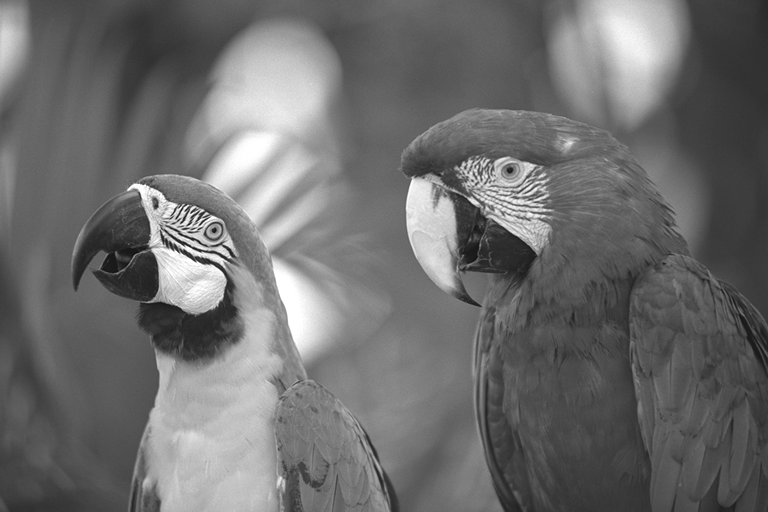

[{'score': 0.4424389898777008, 'label': 'macaw'},
 {'score': 0.08767358958721161, 'label': 'popinjay'},
 {'score': 0.07458024471998215, 'label': 'parrot'},
 {'score': 0.07278897613286972, 'label': 'parodist, lampooner'},
 {'score': 0.04623128101229668, 'label': 'poll, poll_parrot'}]

In [ ]:
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

# Create a classification pipeline
classifier = pipeline(model="microsoft/beit-base-patch16-224-pt22k-ft22k")

# Read the image using PIL
img_url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Display the image
display(img)

# Classify the image
classifier(img_url)

Here, the classifier tool, set up with the model "microsoft/beit-base-patch16-224-pt22k-ft22k", classifies the image at the given URL. The result is a label indicating the main subject of the image and a confidence score.

Now, let's classify the image with specific candidate labels:

2023-08-01 14:01:02.028179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


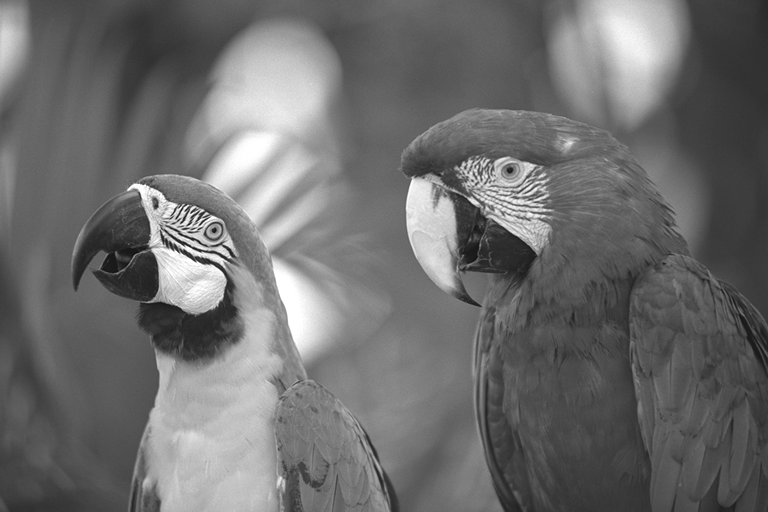

[{'score': 0.9651921987533569, 'label': 'animals'},
 {'score': 0.029521869495511055, 'label': 'humans'},
 {'score': 0.0052859727293252945, 'label': 'landscape'}]

In [ ]:
classifier = pipeline(model="openai/clip-vit-large-patch14")

# Read and display the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
display(img)

# Classify the image with specific candidate labels
classifier(
    img_url,
    candidate_labels=["animals", "humans", "landscape"],
)

In this case, the `classifier` tool, set up with the model "openai/clip-vit-large-patch14", is again used to classify the image. However, this time we provide specific labels ("animals", "humans", "landscape") to guide the classification. The result is a label from our candidate list and a confidence score. Incredible, right? 😎

## Additional
1. What if you find a good model but having unlabeled prediction

In [ ]:
from transformers import pipeline
# example in sentiment analysis
model_name_sa = "Bhumika/roberta-base-finetuned-sst2"
classifier = pipeline("sentiment-analysis", model=model_name_sa)
classifier("good job on solving those bugs")

/Users/ruangguru/Projects/ai-bootcamp/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'label': 'LABEL_1', 'score': 0.999832272529602}]

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer, pipeline

#  add id to label for model config
id2label = {
    0: "negative",
    1: "positive"
  }

#  add label to id for model config
label2id= {
    "positive": 1,
    "negative": 0
  }

#  load config of the pretrained model
config = AutoConfig.from_pretrained(model_name_sa)

# add your id2label and label2id to model's config
config.id2label = id2label
config.label2id = label2id

#  load tokenizer and model with new config
model = AutoModelForSequenceClassification.from_pretrained(model_name_sa, config=config)
tokenizer = AutoTokenizer.from_pretrained(model_name_sa)

#  create your pipeline with defined model and tokenizer
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
classifier("good job on solving those bugs")

[{'label': 'positive', 'score': 0.999832272529602}]

## Exercise Pipeline

In [ ]:
!pip install rggrader sentencepiece

In [ ]:
# @title #### Student Identity
student_id = "student_id" # @param {type:"string"}
name = "your_name" # @param {type:"string"}

In [ ]:
# @title #### 00. Chat Application
from rggrader import submit

# Imagine a scenario where you have a chatbot application capable of translating a message from Indonesian to English, generating a response, and analyzing the sentiment of the response. To achieve this, you decide to use HuggingFace's pipeline() function.

# TODO: Create a function that receives an Indonesian chat message as an argument, translates it into English, generates a response, and performs sentiment analysis on the response. For each of these tasks, use specific models with HuggingFace's pipeline() function.
# - For translation, use "Helsinki-NLP/opus-mt-id-en".
# - For text-generation, use "gpt2".
# - For sentiment-analysis, use "distilbert-base-uncased-finetuned-sst-2-english".
# The function should return a dictionary containing the original Indonesian chat, the English translation, the generated response, the sentiment and the associated score.

def chat_application(chat:str):
  # Put your code here:
  translation = ""
  response = ""
  sentiment = ""

  return {
    "Indonesian Chat": chat,
    "Translation": translation,
    "Response": response,
    "Sentiment": sentiment['label'],
    "Score": sentiment['score']
  }
  # ---- End of your code ----

# Process all chats
indonesian_chats = [
    "Ceritakan kisah inspiratif tentang mengatasi tantangan.",
    "Apa dampak negatif dari Perang Dunia II?",
]
results = []
submit_results = []
for chat in indonesian_chats:
  result = chat_application(chat)
  results.append(result)

  # Only submit Translation and Sentiment
  submit_results.append({"Translation": result["Translation"], "Sentiment": result["Sentiment"]})

# Print all results
for result in results:
  print("---\nIndonesian Chat: {0}\nTranslation: {1}\nResponse: {2}\nSentiment: {3}, Score: {4}\n---".format(
      result["Indonesian Chat"],
      result["Translation"],
      result["Response"],
      result["Sentiment"],
      result["Score"]
  ))


# Submit Method
assignment_id = "00_pipeline"
question_id = "00_chat_application"
submit(student_id, name, assignment_id, str(submit_results), question_id)